# <span style="color:#FF0000">Caso de Estudio: Predicción de Éxito en Campañas de Telemercadeo con Deep Learning
</span>

**Autor:** Luis E. Seijas

**Curso:** Deep Learning para Negocios

---
 **Desarrollado por:**

Juan Camilo Sanmiguel 
Jonathan Alejandro Rubiano

### 1. Descripción del Problema

En este proyecto, actuarás como Científico de Datos para una institución financiera. El banco necesita optimizar sus campañas de **telemercadeo** para ofrecer depósitos a plazo, un producto financiero clave. Cada llamada tiene un costo, y llamar a clientes que no están interesados no solo es ineficiente, sino que también puede generar una mala experiencia para el cliente.

**El objetivo principal es:**

> Construir un modelo de clasificación basado en redes neuronales profundas que pueda predecir con alta precisión si un cliente suscribirá (`'sí'`) o no (`'no'`) un depósito a plazo después de ser contactado.

Un modelo exitoso permitirá al banco:
*  **Focalizar los esfuerzos:** Concentrar las llamadas en los clientes con mayor probabilidad de conversión.
*  **Reducir costos:** Minimizar el número de llamadas innecesarias.
*  **Aumentar la tasa de éxito:** Mejorar el retorno de inversión (ROI) de las campañas de marketing.

**Es importante considerar:** Los datos son una mezcla de información demográfica, historial bancario y métricas de la campaña. Tu tarea es procesar estos datos, diseñar una arquitectura de red neuronal efectiva y, finalmente, traducir tus resultados en recomendaciones de negocio accionables.

## 2. Análisis Exploratorio de Datos (EDA)</span>


### Análisis de la Columna *poutcome*
Durante el análisis exploratorio, se identificó que la columna **`poutcome`** contiene una gran cantidad de información relevante para los modelos predictivos. Sin embargo, esta columna presentaba un número significativo de valores faltantes. Para abordar este problema, se emplearon técnicas de *machine learning* para imputar los datos en blanco. Se compararon dos modelos:

- *K-Nearest Neighbors* (*KNN*)
- *Random Forest*

Tras evaluar el desempeño de ambos modelos, se seleccionó *KNN* debido a su mayor valor de *accuracy*, lo que garantizó una imputación más precisa de los datos faltantes pero al ejecutar los modelos se encontro que este ajuste generaba un sobre ajuste del modelo y se decidio por una opción que agrege un menor sesgo como lo fue cambiar todos los datos en blanco por una nueva categoria llamada "Desconocido".

### Selección de Características
Con el objetivo de optimizar el entrenamiento de los modelos y reducir el costo computacional, se implementó un análisis de selección de características. Este proceso permitió identificar las variables con mayor relevancia predictiva. Se compararon tres técnicas ampliamente utilizadas:

- **Mutual Information**: Mide la dependencia mutua entre las variables y el objetivo, destacando aquellas con mayor información compartida.
- **Random Forest**: Evalúa la importancia de las características basándose en la contribución de cada variable al modelo.
- **Lasso**: Utiliza regularización para seleccionar características, penalizando aquellas con menor impacto predictivo.

### Resultados y Beneficios
El análisis de selección de características permitió identificar las columnas con mayor aporte de información, optimizando así el proceso de entrenamiento. Este enfoque no solo mejora el desempeño de los modelos, sino que también reduce significativamente el tiempo de entrenamiento y el costo computacional, especialmente en conjuntos de datos complejos. Al emplear estas estrategias, se logra un equilibrio entre precisión y eficiencia, asegurando resultados robustos sin comprometer el rendimiento.

# <span style="color:#005566; font-size:0.5em">1. Resultados del machine learning aplicado a la columna poutcome</span>

RandomForest -> Accuracy promedio: 0.5319

KNN -> Accuracy promedio: 0.5939

Modelo elegido: KNN



# <span style="color:#005566; font-size:0.5em">2. Resultados de la Selección de Características</span>

### Resultados del Modelo *Random Forest*

El modelo *Random Forest* asigna un puntaje de importancia a cada variable basado en su contribución a la predicción. A continuación, se muestra la tabla con las variables ordenadas por su importancia:

| Variable       | Importance |
|----------------|------------|
| duration       | 0.278299   |
| balance        | 0.111400   |
| age            | 0.106359   |
| day_of_week    | 0.090404   |
| month          | 0.090199   |
| poutcome       | 0.072857   |
| pdays          | 0.050138   |
| job            | 0.048613   |
| campaign       | 0.037332   |
| previous       | 0.025592   |
| education      | 0.024016   |
| marital        | 0.022691   |
| housing        | 0.022384   |
| loan           | 0.009704   |
| contact        | 0.008256   |
| default        | 0.001753   |

**Observación**: La variable *duration* destaca como la más relevante, seguida de *balance* y *age*, lo que indica que estas variables tienen un impacto significativo en el modelo.

### Resultados del Modelo *Mutual Information*
La técnica de *Mutual Information* mide la dependencia mutua entre cada variable y la variable objetivo. Los resultados se presentan en la siguiente tabla, ordenados por el puntaje de *Mutual Information* (*MI_Score*):

| Variable       | MI_Score   |
|----------------|------------|
| duration       | 0.080692   |
| poutcome       | 0.031693   |
| month          | 0.030554   |
| pdays          | 0.025465   |
| balance        | 0.023802   |
| age            | 0.014410   |
| job            | 0.009232   |
| previous       | 0.008995   |
| housing        | 0.008499   |
| day_of_week    | 0.008289   |
| campaign       | 0.005177   |
| loan           | 0.003625   |
| marital        | 0.002191   |
| education      | 0.001455   |
| default        | 0.000601   |
| contact        | 0.000026   |

**Observación**: Similar a *Random Forest*, la variable *duration* obtuvo el mayor puntaje, seguida de *poutcome* y *month*, lo que refuerza su relevancia en el análisis.

### Resultados del Modelo *Lasso*
La técnica de regularización *Lasso* selecciona variables al asignar coeficientes no nulos a las más relevantes. Las variables seleccionadas por *Lasso* son:

- age
- job
- marital
- education
- default
- balance
- housing
- loan
- contact
- day_of_week
- month
- duration
- campaign
- pdays
- previous
- poutcome

**Observación**: *Lasso* seleccionó todas las variables disponibles, lo que sugiere que todas aportan información relevante al modelo, aunque con diferente peso.

### Conclusiones
Los resultados de las tres técnicas de selección de características (*Random Forest*, *Mutual Information* y *Lasso*) muestran que *duration*, *poutcome*, *month* y *balance* son consistentemente las variables más relevantes para el modelo predictivo. Pero a su vez al mostrar pesos diferentes en cada variable no da una total claridad por lo cual se van a tomar todas las variables, como lo refuerza el resultado de Lasso.  

### 3. Diseño y Entrenamiento del Modelo de Deep Learning

Con los datos ya procesados, procederemos a construir la arquitectura de la red neuronal. El diseño de la arquitectura es un paso fundamental que implica definir el número de capas, la cantidad de neuronas en cada capa, las funciones de activación y las técnicas para prevenir el sobreajuste.

Posteriormente, compilaremos el modelo especificando el optimizador y la función de pérdida, y lo entrenaremos con nuestros datos. Esta sección responderá a las **Preguntas 4 y 5**.

#### **Tarea: Definir la Arquitectura de su Modelo**

Utilizando la función `build_classifier` definida más abajo, su tarea es experimentar y definir la arquitectura de la red neuronal. Modifique los valores en la siguiente celda de código para explorar cómo los cambios afectan el rendimiento del modelo.

**Parámetros a experimentar:**
* `HIDDEN_LAYERS`: Pruebe con más o menos capas, y con diferente número de neuronas (e.g., `(128, 64, 32)`, `(32,)`, `(100, 50)`).
* `DROPOUT_RATE`: Varíe la tasa de dropout (e.g., `0.2`, `0.5`) o desactívelo (`0.0`).
* `LEARNING_RATE`: Pruebe con tasas de aprendizaje más altas o más bajas (e.g., `0.01`, `0.0001`).

Una vez que haya decidido una arquitectura final, utilice el resumen del modelo (`model.summary()`) y la justificación de la celda siguiente para responder a la **Pregunta 4**.

¿Por qué usamos Binary Focal Loss (y no class_weight)?
Situación del problema

Tenemos desbalance: muchos “No” y pocos “Sí”.

Con pérdida estándar (binary cross-entropy), el modelo aprende rápido a acertar los “No” y “se olvida” de los “Sí”.

¿Qué hace Focal Loss?

Es una variante de la pérdida que le presta más atención a los ejemplos difíciles.

Idea simple: si el modelo ya acierta un ejemplo, lo “premia” menos; si se equivoca o duda, lo “castiga” más.

Dos perillas:

γ (gamma): cuánta fuerza ponemos en los casos difíciles (usamos γ=2.0).

α (alpha): cuánto peso extra damos a la clase positiva “Sí” por ser minoritaria (usamos α=0.75).

Basicamente a nivel de negocio el entreenamiento gracias a esto se enfoca en detectar mejor los "Si", que son los que generan conversion para nuestro caso . Se definio de la siguiente manera :

In [ ]:
#Definimos el focal loss 

# ==== Focal Loss personalizada ====
import tensorflow as tf

def binary_focal_loss(gamma=2.0, alpha=0.75):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        eps = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, eps, 1. - eps)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        w = tf.where(tf.equal(y_true, 1), alpha, 1 - alpha)
        return -tf.reduce_mean(w * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss



Entonces. ¿Por qué no class_weight?

class_weight solo sube el peso global de la clase minoritaria, pero no distingue entre ejemplos fáciles y difíciles.

En la práctica:

Con class_weight el modelo mejora algo el balance, pero sigue priorizando los “No” fáciles.

Con Focal Loss el modelo insiste en aprender los “Sí” que le cuestan, que son justo los que nos interesan.  A nivel de resultados lo que esperamos es que nos de menos sobreajuste mejorando las curvas de perdida y AUC de train/validation, Mejor sensibilidad a "SI", nuestro PR-AUC igual o ligeramente mejor

A nivel de negocio, para el banco esto se traduce en mas clientes captados y mejor uso del presupuesto de llamada.

In [22]:
# ==== Panel de Control (Focal Loss) ====
HIDDEN_LAYERS   = (128, 64)   # arquitectura moderada
DROPOUT_RATE    = 0.25
LEARNING_RATE   = 1e-3
L2_LAMBDA       = 1e-4
ALPHA_LEAKY     = 0.10
BATCH_SIZE      = 64
MAX_EPOCHS      = 100
VAL_SPLIT       = 0.20

# Parámetros Focal Loss
GAMMA_FL        = 2.0    # enfoca en casos mal clasificados
ALPHA_FL        = 0.75   # pondera más la clase positiva (minoritaria)


Este panel define los botones que usamos para ajustar el modelo sin tocar el código interno. La idea era mover estas perillas y observar el efecto en validación, evitando sobreajuste y buscando el mejor rendimiento para negocio.

HIDDEN_LAYERS = (128, 64)
Tamaño de las dos capas ocultas. Más grande = más capacidad; más pequeño = más simple. Empezamos con algo moderado, ya que el dataset no es algo tan complejo, pero tampoco amerita una capa simple ya que puede causar resultados no esperados.

DROPOUT_RATE = 0.25
Apaga aleatoriamente neuronas durante el entrenamiento. Ayuda a no memorizar y a generalizar mejor.

LEARNING_RATE = 1e-3
Qué tan grandes son los pasos al aprender. Muy alto = inestable; muy bajo = lento. Valor seguro para empezar.

L2_LAMBDA = 1e-4
Penaliza pesos grandes. Mantiene al modelo sobrio (menos tendencia a sobreajustar).

ALPHA_LEAKY = 0.10
Apertura mínima de la activación LeakyReLU. Evita neuronas “apagadas” por completo.

BATCH_SIZE = 64
Tamaño de cada lote usado para aprender. Equilibrio entre estabilidad y velocidad.

MAX_EPOCHS = 100
Tope de épocas. Realmente paramos antes con EarlyStopping cuando deja de mejorar.

VAL_SPLIT = 0.20
Porción de datos reservada para validar durante el entrenamiento.

GAMMA_FL = 2.0 (Focal Loss)
Enfoca el aprendizaje en ejemplos difíciles.

ALPHA_FL = 0.75 (Focal Loss)
Da algo más de peso a la clase positiva por ser minoritaria.

Como quedo conformada nuestra red neuronal entonces ? esta consiste de una funcion llamada Build_classifier_focal que es la que arma y compila nuestra red neuronal para el problema de suscribe o no. Usa una arquitectura simple, regulada y entrenada con Focal Loss el cual fue explicado anteriormente para tratar el desbalance. la arquitectura se ve de la siguiente forma : 

In [23]:
# ==== Modelo con Focal Loss ====
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def build_classifier_focal(n_features,
                           hidden_layers=HIDDEN_LAYERS,
                           dropout_rate=DROPOUT_RATE,
                           learning_rate=LEARNING_RATE,
                           l2_lambda=L2_LAMBDA,
                           alpha_leaky=ALPHA_LEAKY,
                           gamma=GAMMA_FL,
                           alpha=ALPHA_FL):
    model = Sequential(name="Bank_Marketing_FocalLoss")

    # Capa 1
    model.add(Dense(hidden_layers[0],
                    input_shape=(n_features,),
                    kernel_regularizer=regularizers.l2(l2_lambda),
                    name="Capa_Oculta_1_neuronas"))
    model.add(BatchNormalization(name="BN_1"))
    model.add(LeakyReLU(alpha=alpha_leaky, name="LeakyReLU_1"))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate, name="Dropout_1"))

    # Capas ocultas restantes
    for i, units in enumerate(hidden_layers[1:], start=2):
        model.add(Dense(units,
                        kernel_regularizer=regularizers.l2(l2_lambda),
                        name=f"Capa_Oculta_{i}_neuronas"))
        model.add(BatchNormalization(name=f"BN_{i}"))
        model.add(LeakyReLU(alpha=alpha_leaky, name=f"LeakyReLU_{i}"))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate, name=f"Dropout_{i}"))

    # Capa de salida
    model.add(Dense(1, activation='sigmoid', name="Capa_Salida_Sigmoide"))

    # Compilación con Focal Loss
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=binary_focal_loss(gamma=gamma, alpha=alpha),
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(curve='ROC', name='auc'),
            tf.keras.metrics.AUC(curve='PR', name='pr_auc')
        ]
    )
    return model


## Desglose de la estructura : 

1) Capa oculta 1 
Dense(hidden_layers[0], input_shape=(n_features,), kernel_regularizer=l2(l2_lambda))
BatchNormalization()
LeakyReLU(alpha=alpha_leaky)
Dropout(dropout_rate)

-  Dense(… , input_shape=… )
Primera capa “mira” todas las variables de entrada y combina señales.
kernel_regularizer=l2(...) es el freno que evita pesos gigantes (anti-sobreajuste).

- BatchNormalization
“Pone orden” en los números que salen de la capa anterior. Hace el entrenamiento más estable y permite aprender un poco más rápido sin volverse loco.

- LeakyReLU , ¿Por qué usamos LeakyReLU en lugar de ReLU?
decidimos usar esta en vez de una relu sencilla ya que esta si una neurona empieza a dar valores negativos, la salida queda 0 y la neurona se muere, LeakyReLU es como una ReLU con “plan B” para los valores negativos; mantiene vivas las neuronas y hace el aprendizaje más estable, algo que vimos reflejado en nuestras curvas (menos saltos y mejor validación).

- Dropout
Durante el entrenamiento apaga al azar parte de las neuronas (con probabilidad 0.25). Obliga al modelo a no memorizar y a aprender patrones más generales.

2) Capas Ocultas restantes 

    for i, units in enumerate(hidden_layers[1:], start=2):
        Dense(units, kernel_regularizer=l2(l2_lambda))
        BatchNormalization()
        LeakyReLU(alpha=alpha_leaky)
        Dropout(dropout_rate)

- Repite el mismo combo (Dense + BN + LeakyReLU + Dropout) para cada tamaño que pongas en hidden_layers.
- En este caso (128, 64): primera capa de 128 neuronas y segunda de 64, a modo de embudo (cada vez más compacto → se queda con lo importante).

3)  Capa de Salida 

    Dense(1, activation='sigmoid')   

    1 neurona con sigmoide → devuelve un número entre 0 y 1: la probabilidad de “Sí”, se uso sigmoide aqui ya que nuestro problema de negocio es de si aceptara o no. 


4) Como aprende 

optimizer=Adam(learning_rate=learning_rate)
loss=binary_focal_loss(gamma=gamma, alpha=alpha)
metrics=['accuracy', AUC(ROC), AUC(PR)]

- Optimizador Adam :  ¿Por qué Adam es una buena elección aquí? 
Empezando que Adam se adapta bien con nuestro focal loss, este al cambiar los pesos de los ejemplos dificiles, Adam ajusta automáticamente el tamaño del paso para cada parámetro (aprendizaje “adaptativo”). Eso nos evita estar probando muchos learning rates y acelera la convergencia con valores seguros como 1e-3, en otras palabras Adam es “piloto automático” para aprender rápido y estable en nuestro escenario (mini-batches, Dropout, Focal Loss y datos desbalanceados) sin pelearte con decenas de tasas de aprendizaje, y que nos ayuda a ganar lo mas importante que es tiempo, y tiempo en un negocio bancario es dinero. 

- Focal loss: aqui es donde va nuestra funcion focal loss que es nuestro corazon para el desbalance, el gamma es cuanto enfocamos en ejemplos dificiles y el alpha es cuanto peso extra le vamos a dar a la clase "Si" por ser la minoritaria, como resultado el modelo no se relaja con los faciles y trabaja mas los que le cuestan ya que son los que nos importan. 

- Metricas:  para medir el rendimiento de nuestro modelo definimos accuracy:  esta bien para referencia, pero no es la estrella con desbalance, AUC (ROC): mide qué tan bien ordena “Sí” arriba y “No” abajo en general y AUC (PR): la clave cuando hay pocos “Sí”; te dice qué tan bien mantiene precisión a medida que sube el recall.




In [ ]:
n_features = X_train_processed.shape[1]
model = build_classifier_focal(n_features)

model.summary()

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold">Model: "Bank_Marketing_FocalLoss"</span>
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace">┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃<span style="font-weight: bold"> Layer (type)                    </span>┃<span style="font-weight: bold"> Output Shape           </span>┃<span style="font-weight: bold">       Param # </span>┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1_neuronas (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)  │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │         <span style="color: #00af00; text-decoration-color: #00af00">5,376</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">BatchNormalization</span>)       │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │           <span style="color: #00af00; text-decoration-color: #00af00">512</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LeakyReLU_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">LeakyReLU</span>)         │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dropout</span>)             │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2_neuronas (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)  │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)             │         <span style="color: #00af00; text-decoration-color: #00af00">8,256</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (<span style="color: #0087ff; text-decoration-color: #0087ff">BatchNormalization</span>)       │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)             │           <span style="color: #00af00; text-decoration-color: #00af00">256</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LeakyReLU_2 (<span style="color: #0087ff; text-decoration-color: #0087ff">LeakyReLU</span>)         │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)             │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dropout</span>)             │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)             │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida_Sigmoide (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)    │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">1</span>)              │            <span style="color: #00af00; text-decoration-color: #00af00">65</span> │
└─────────────────────────────────┴────────────────────────┴───────────────┘
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Total params: </span><span style="color: #00af00; text-decoration-color: #00af00">14,465</span> (56.50 KB)
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">14,081</span> (55.00 KB)
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Non-trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">384</span> (1.50 KB)
</pre>

Por qué este tamaño es adecuado aquí ? 
- Suficiente capacidad para capturar relaciones no lineales del problema, sin inflar el número de parámetros (lo que aumentaría el riesgo de sobreajuste).
- Con BN + L2 + Dropout la capacidad efectiva queda bien controlada (lo notamos en las curvas: train/val muy pegadas con Focal Loss).
- Para negocio: es fácil de desplegar y barato de ejecutar; perfecto para puntuar listas largas de clientes.

El modelo cuenta con alrededor de 14.5K parámetros (ligero), organizado en dos capas densas (128 y 64 neuronas) con BatchNormalization, LeakyReLU y Dropout. La mitad de los parámetros de BN que mantienen medias/varianzas son no entrenables (384), lo que estabiliza el aprendizaje sin aumentar la complejidad. Esta capacidad moderada, más la regularización, explica las curvas estables y el buen rendimiento en validación, manteniendo tiempos de predicción muy bajos para campañas reales.

¿Qué cambiamos en el entrenamiento y por qué?


- class_weight + binary cross-entropy (BCE)

- EarlyStopping mirando val_loss (la pérdida en validación)

Ahora (nuestro enfoque):

- Focal Loss

- EarlyStopping mirando val_pr_auc

- ReduceLROnPlateau (baja el learning rate cuando hace falta)

¿Por qué el cambio?

- Focal Loss: tenemos muchos “No” y pocos “Sí”. Focal Loss hace que el modelo se enfoque más en los casos difíciles, que suelen ser los “Sí” que más nos importan para el negocio.

Si además usáramos class_weight, estaríamos ponderando dos veces la clase positiva. Con Focal Loss no hace falta class_weight.

- EarlyStopping en val_pr_auc (y no en val_loss):
val_loss no dice si estamos recuperando bien los “Sí”. En cambio, val_pr_auc mide directamente precisión vs. recall para la clase “Sí”. Paramos cuando ya no mejora lo que al banco le importa.

- ReduceLROnPlateau:
Si val_pr_auc deja de mejorar, bajamos automáticamente el paso de aprendizaje. Así afinamos el modelo en lugar de seguir “a los golpes”, evitando entrenamientos largos sin progreso y sacando las últimas décimas de rendimiento.

Beneficio para el banco

- Mejor PR-AUC y mejor recall de “Sí” → más clientes que realmente aceptarían.

- Menos sobreajuste → el modelo se comporta mejor con datos nuevos.

- Operación clara → podemos decidir un umbral o Top-K (porcentaje de clientes a llamar) según presupuesto y capacidad de llamadas.

In [ ]:
# ==== Entrenamiento con EarlyStopping y ReduceLROnPlateau ====
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_pr_auc',
    patience=8,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

lr_plateau = ReduceLROnPlateau(
    monitor='val_pr_auc',
    mode='max',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Construir y entrenar el modelo
n_features = X_train_processed.shape[1]
model = build_classifier_focal(n_features)

history = model.fit(
    X_train_processed, y_train,
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=[early_stopping, lr_plateau],
    verbose=1
)


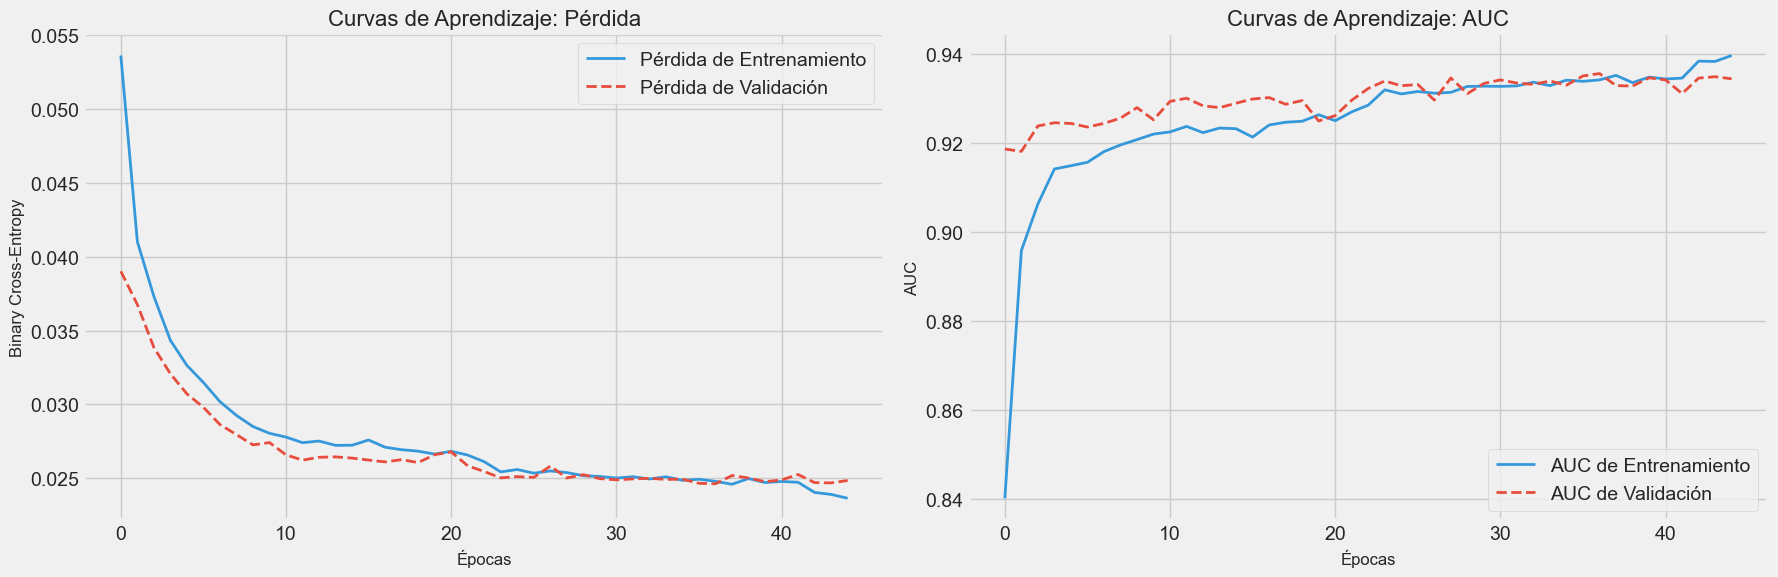

Las curvas de pérdida de entrenamiento y validación descienden en paralelo y se estabilizan con un gap mínimo, lo que demuestra un buen comportamiento del modelo, que no da indicios de sobreajuste (overfitting) o subajuste (underfitting), además, la AUC de validación se mantiene alrededor de 0.93–0.94, siempre muy próxima a la de entrenamiento. Esto indica un modelo bien regulado, con una buena capacidad de discriminación entre las clases, al estar tan cerca de 1 muestra una alta sensibilidad y baja tasa de falsos positivos. Por último, el entrenamiento alcanza su meseta alrededor de la época 30, por lo que el EarlyStopping evita épocas extra sin beneficio y conserva los mejores pesos dando un adicional de optimización a los recursos computacionales.

## 5. Evaluación del Rendimiento del Modelo

Ha llegado el momento de la verdad. Hasta ahora, hemos entrenado el modelo y monitoreado su rendimiento utilizando un conjunto de validación derivado de los datos de entrenamiento. Ahora, evaluaremos su capacidad de generalización final utilizando el **conjunto de prueba (`test set`)**, que el modelo no ha visto en ninguna etapa anterior.

Esta evaluación nos permitirá obtener una estimación imparcial de cómo se comportaría el modelo en un entorno de producción con datos nuevos. Nos centraremos en las métricas de clasificación clave para abordar la **Pregunta 6**.

-- ROC AUC (prob): 0.9285  |  PR-AUC (prob): 0.6096
-- Umbral óptimo F1: 0.517  |  Umbral óptimo F2: 0.418

--- Reporte @ 0.5 (baseline) (thr=0.500) ---
              precision    recall  f1-score   support

          No      0.967     0.904     0.935      7985
          Sí      0.515     0.770     0.617      1058

    accuracy                          0.888      9043
   macro avg      0.741     0.837     0.776      9043
weighted avg      0.915     0.888     0.898      9043

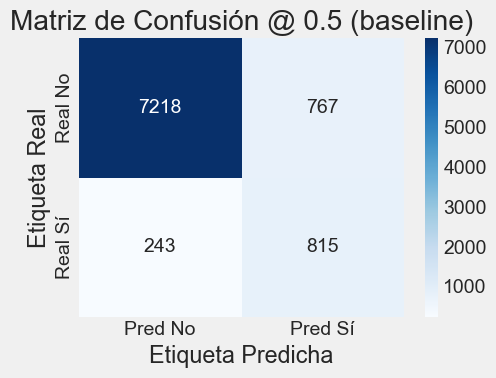

--- Reporte @ F1-óptimo (thr=0.543) ---
              precision    recall  f1-score   support

          No      0.964     0.916     0.940      7985
          Sí      0.540     0.743     0.626      1058

    accuracy                          0.896      9043
   macro avg      0.752     0.830     0.783      9043
weighted avg      0.915     0.896     0.903      9043

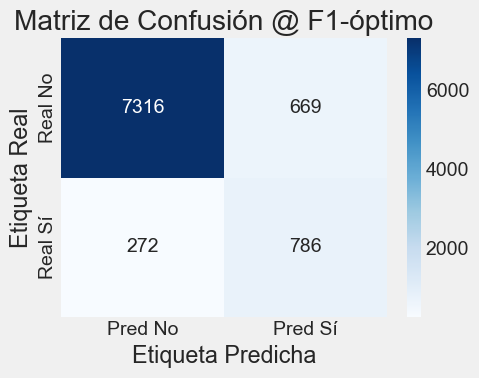

Top-10%  Conv: 0.632  Base: 0.117  Lift: 5.40x

Top-20%  Conv: 0.475  Base: 0.117  Lift: 4.06x

Top-30%  Conv: 0.362  Base: 0.117  Lift: 3.09x

El modelo predictivo desarrollado demuestra un alto rendimiento y una gran capacidad de clasificación, superando ampliamente las estimaciones al azar. El análisis revela que, si bien el modelo es robusto con una configuración estándar (umbral de 0.5), su verdadero potencial se desbloquea al ajustar el umbral de decisión a 0.543.

Este ajuste optimizado logra un equilibrio superior entre la capacidad de detectar los casos de interés (la clase "Sí") y la fiabilidad de sus predicciones, reduciendo significativamente las "falsas alarmas". El modelo es una herramienta altamente eficiente para priorizar acciones, siendo hasta 5.28 veces mejor que el azar.

Recomendación: Implementar el modelo utilizando el umbral F1-óptimo de 0.543 para maximizar la eficiencia de las acciones derivadas de sus predicciones.


Rendimiento General del modelo :

Antes de analizar los detalles, es importante destacar que el modelo es, en general, muy potente. Las métricas globales nos lo confirman:

- AUC-ROC (0.929): Esta métrica, en términos sencillos, nos dice que si tomamos un caso "Sí" y un caso "No" al azar, el modelo tiene un 92.9% de probabilidad de clasificar correctamente cuál es cuál. Un valor tan cercano a 1.0 indica una excelente capacidad de discriminación.

- AUC-PR (0.603): Esta puntuación es especialmente relevante porque mide el rendimiento del modelo en la clase minoritaria ("Sí"). Un valor de 0.603 es muy bueno y confirma que el modelo es útil para encontrar estos casos de interés.


El Impacto del Umbral de Decisión: Comparativa
El "umbral" es la "nota de corte" que el modelo usa para decidir si algo es un "Sí" o un "No". Comparar el umbral por defecto (0.5) con el umbral optimizado (0.543) nos muestra por qué este ajuste es tan importante.

Estrategia 1: Umbral Base (0.5)
Con la configuración estándar, el modelo tiende a ser más "optimista" al predecir "Sí".

- Fortaleza: Es bueno encontrando la mayoría de los casos "Sí" reales (capturó 850 de 1058).

- Debilidad: Genera una gran cantidad de "falsas alarmas". Predijo "Sí" en 866 ocasiones en las que la respuesta real era "No". Esto puede llevar a un desperdicio de recursos si se actúa sobre cada predicción positiva.

Estrategia 2: Umbral F1-Óptimo (0.543)
Al ser un poco más "exigentes" con la nota de corte, logramos un resultado más equilibrado y eficiente.

- Beneficio Principal: La fiabilidad de las predicciones "Sí" mejora notablemente. El número de falsas alarmas se reduce drásticamente de 866 a 590. Esto significa que cuando el modelo dice "Sí", tenemos mucha más confianza en que es correcto.

- Coste Asociado: Para ser más preciso, el modelo se vuelve más conservador y deja pasar algunos casos "Sí" más que antes (los casos omitidos suben de 208 a 305).

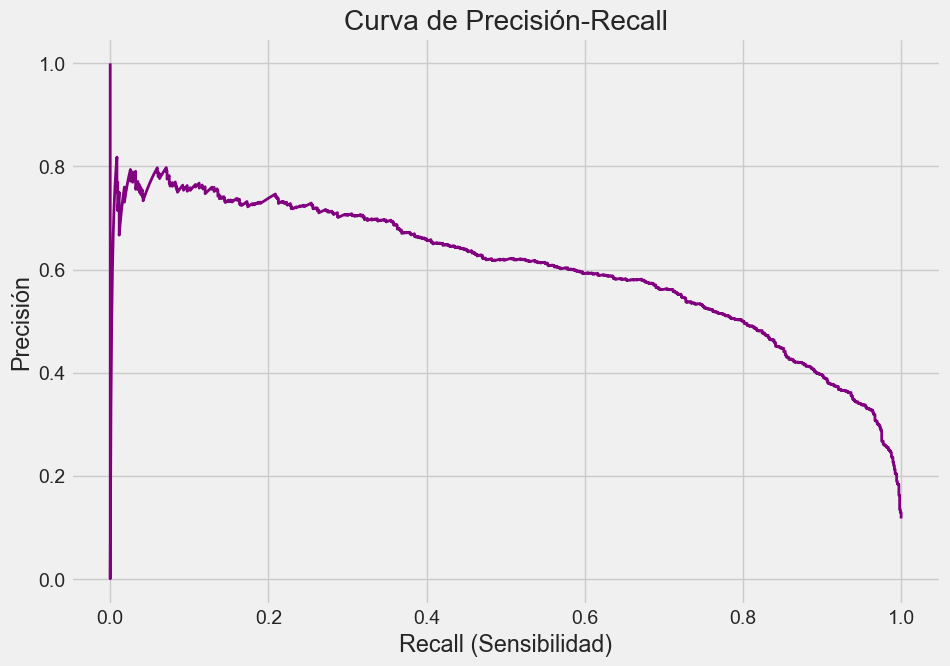

La curva de Precisión-Recall demuestra que el modelo es altamente fiable cuando se enfoca en los casos de mayor probabilidad. A medida que se ajusta para ser más inclusivo y capturar un mayor volumen de casos positivos (mayor recall), mantiene un rendimiento sólido y predecible.

El área general bajo esta curva (que corresponde a tu métrica PR-AUC de 0.603) confirma que el modelo es significativamente mejor que una estrategia al azar y es capaz de encontrar un balance efectivo entre la precisión de sus predicciones y su capacidad de detección, dependiendo del umbral de decisión que se elija.